# Lab 4

Kalyn Howes & Chloe VanCory

11/5/21

Using the adult data, determine what combinations of factors enable a person to make more than $50k per year.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 2 (a)

In [2]:
adults = pd.read_csv('data/adult.data', header=None, skipinitialspace = True,
         names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                 'marital-status', 'occupation', 'relationship', 'race', 'sex',
                 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
)

# 2 (b)

Use the data and the numpy library to compute the following:

i. What are the 25th, 50th, and 75th percentiles of the “education-num” field?

In [3]:
# np.percentile(a, 50) -> finds median/50th percentile of a

education_nums = adults['education-num']
percentile_25 = np.percentile(education_nums, 25)
percentile_50 = np.percentile(education_nums, 50)
percentile_75 = np.percentile(education_nums, 75)
print("The 25th percentile of the 'education-num' field is:", percentile_25)
print("The 50th percentile of the 'education-num' field is:", percentile_50)
print("The 75th percentile of the 'education-num' field is:", percentile_75)

The 25th percentile of the 'education-num' field is: 9.0
The 50th percentile of the 'education-num' field is: 10.0
The 75th percentile of the 'education-num' field is: 12.0


ii. What is the probability that an adult makes more than $50k given that their education-num is within the ranges defined by the above quantiles (from 0 to the 25th percentile, from the 25th to the 50th etc)?

In [4]:
# count number people with >50k incomes with education-nums that fall in each range and divide by total education-nums

above50k = adults[adults['income'] == '>50K']
education_nums_above50k = above50k['education-num']
education_nums_total = len(adults['education-num'])
# print(education_nums_above50k)
print('The probability that an adult makes more than $50k given that their education-num is within...')

# 1) range 0-25th percentile
range1_num = 0
for i in education_nums_above50k:
    if (i <= percentile_25):
        range1_num = range1_num + 1
print('the 0-25th range is:', range1_num / education_nums_total)
        
    
# 2) range 25th - 50th percentiles
range2_num = 0
for i in education_nums_above50k:
    if (i >= percentile_25 and i <= percentile_50):
        range2_num = range2_num + 1     
print('the 25-50th range is:', range2_num / education_nums_total)


# 3) range 50th - 75th percentiles
range3_num = 0
for i in education_nums_above50k:
    if (i >= percentile_50 and i <= percentile_75):
        range3_num = range3_num + 1     
print('the 50-75th range is:', range3_num / education_nums_total)


# 4) range 75th percentile - 1
range4_num = 0
for i in education_nums_above50k:
    if (i >= percentile_75):
        range4_num = range4_num + 1     
print('the 75th-1 range is:', range4_num / education_nums_total)

The probability that an adult makes more than $50k given that their education-num is within...
the 0-25th range is: 0.058935536377875374
the 25-50th range is: 0.09403888086975216
the 50-75th range is: 0.06182242560117932
the 75th-1 range is: 0.12819016614968828


iii. Plot the change in probability that a person makes more and less than $50k given their years of education.

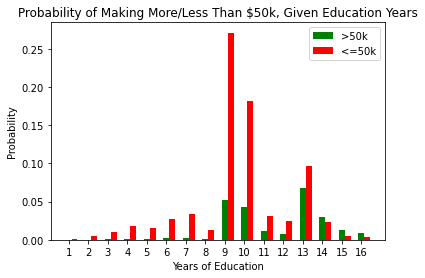

In [5]:
# go through all adults and count above50k and below50k for all education-nums
#education_nums.unique() -> 1-16
above_length = len(adults['income'] == ">50K")
below_length = len(adults['income'] == "<=50K")

below_50k_probs = []
above_50k_probs = []

# from 1-16
for y in range(1,17):
    # all adults with education-nums of y
    ed = adults[adults['education-num'] == y]
    # all adults with education-nums of 1 & incomes <=50K
    ed_below = ed[ed['income'] == "<=50K"]
    ed_above = ed[ed['income'] == ">50K"]
    
    # probability of if the education-num is y, the income is <=$50k
    # number of adults with y years of education & income <=50k / total amount of adults with income <=50k 
    p_below = len(ed_below) / below_length
    p_above = len(ed_above) / above_length
    
    #print("Y=", y)
    #print("Probability Below:", p_below)
    #print("Probability Above:", p_above)
    
    below_50k_probs.append(p_below)
    above_50k_probs.append(p_above)

labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']

x = np.arange(len(labels)) 
width = 0.3
plt.bar(x, above_50k_probs, width, color = "green")
plt.bar(x+width, below_50k_probs, width, color = "red")
plt.xticks(x, labels)
plt.title("Probability of Making More/Less Than $50k, Given Education Years")
plt.xlabel("Years of Education")
plt.ylabel("Probability")
plt.legend([">50k", "<=50k"])

iv. What is the covariance between the number of hours worked per week and education-num?

$$ cov(X,Y) = \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x}) (y_i - \bar{y}) $$

In [6]:
hours = adults['hours-per-week']
N = hours.count()
xbar = hours.mean()
ybar = education_nums.mean()

sum = 0
for i in range(N):
    product = (hours[i] - xbar) * (education_nums[i] - ybar)
    sum = sum + product

covariance = sum / (N - 1)
print('The Covariance between # of hours worked per week & education-num:', covariance)

The Covariance between # of hours worked per week & education-num: 4.705337944611504


v. Use the pandas.DataFrame.boxplot functionality to create a box-and-whisker plot which illustrates the spread of hours worked among adults who make both more and less than $50k.

Text(0, 0.5, 'Hours Worked/Week')

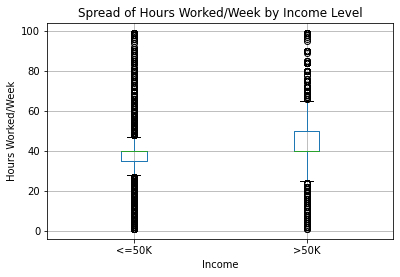

In [7]:
adults.boxplot(column=['hours-per-week'], by='income')
plt.title('Spread of Hours Worked/Week by Income Level')
plt.suptitle('')
plt.xlabel('Income')
plt.ylabel('Hours Worked/Week')

vi. Use the pandas.DataFrame.boxplot functionality to create a box-and-whisker plot which
illustrates the spread of hours worked among adults from each native country and who make
more and less than $50k

/Applications/JupyterLab.app/Contents/Resources/jlab_server/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


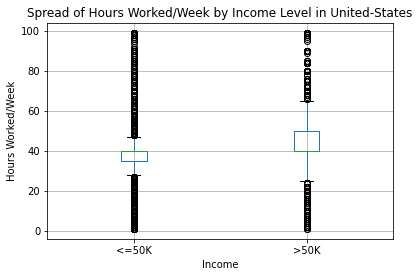

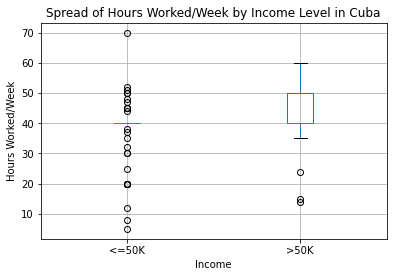

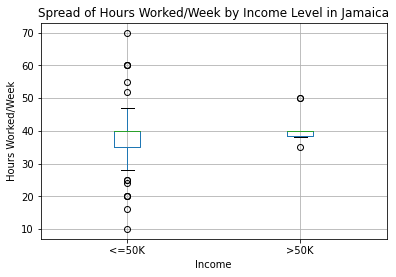

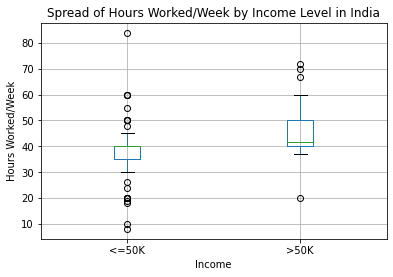

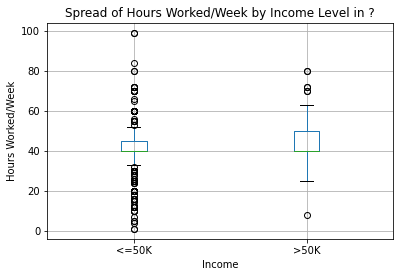

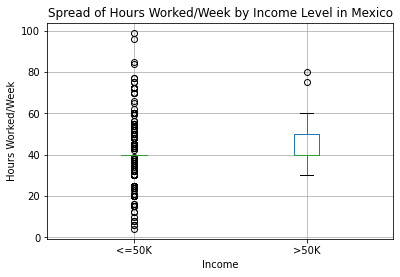

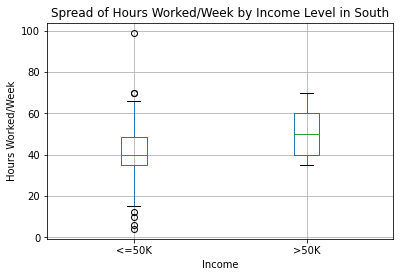

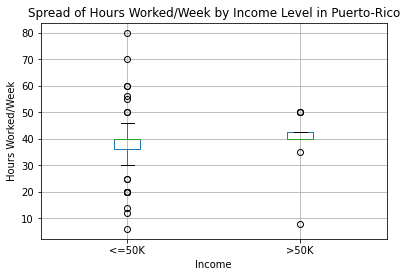

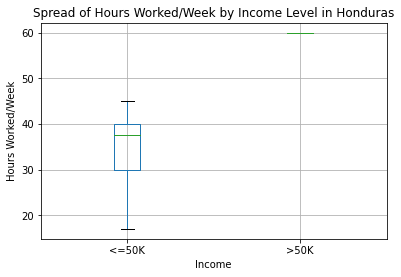

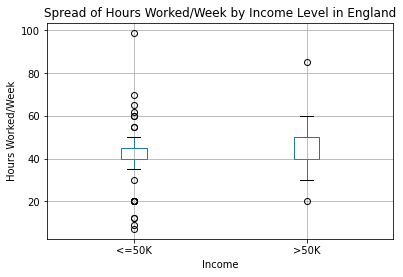

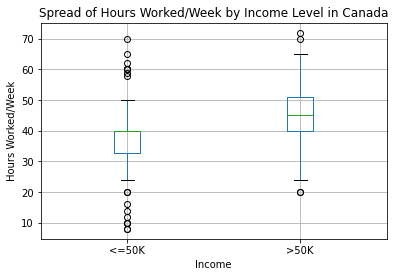

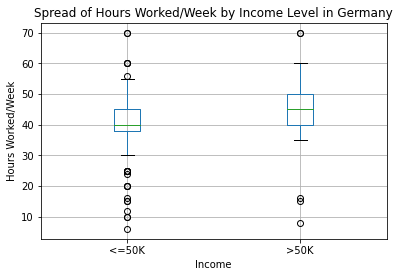

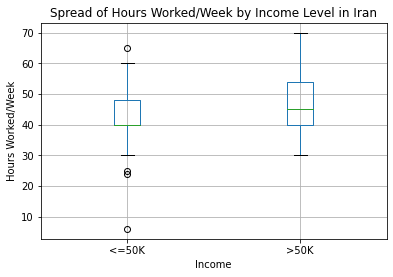

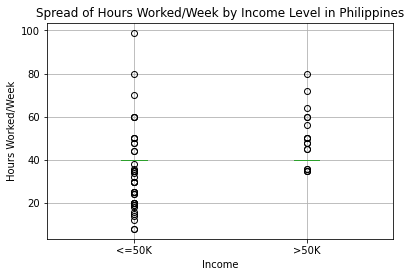

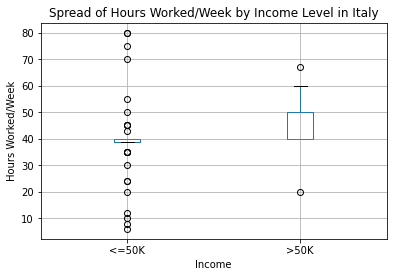

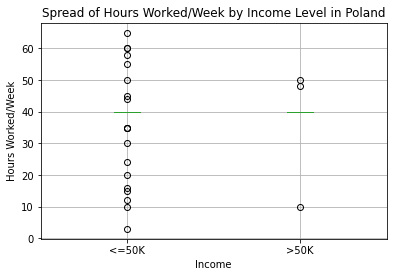

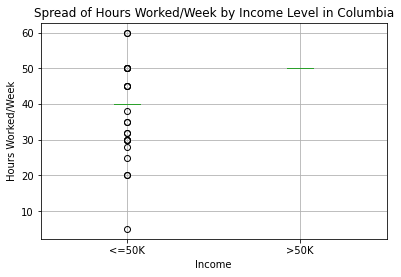

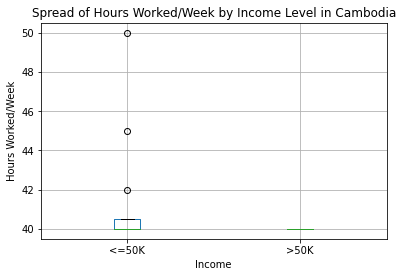

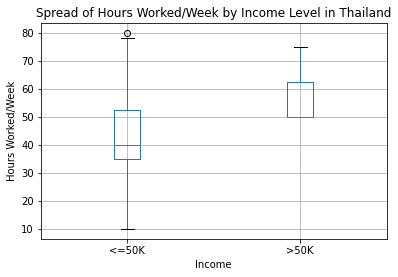

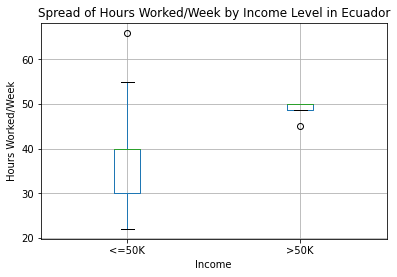

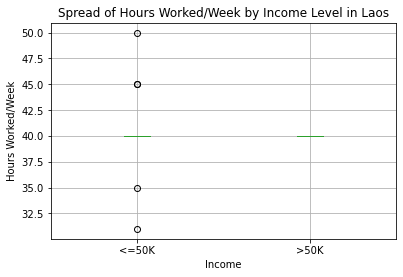

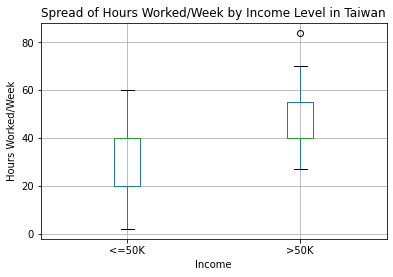

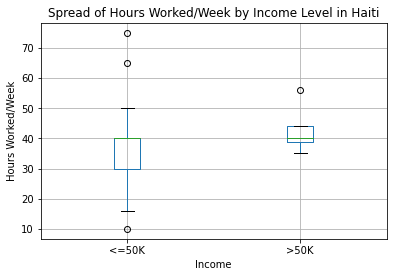

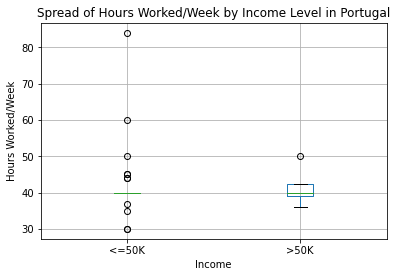

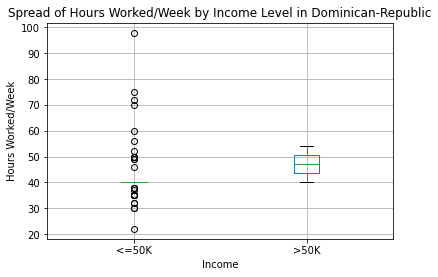

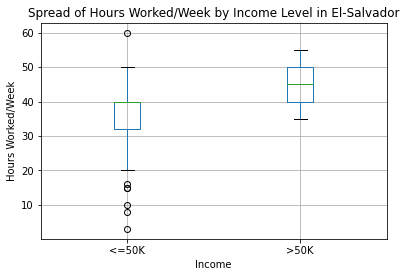

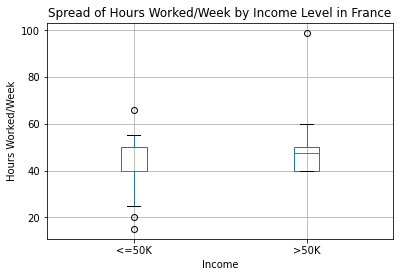

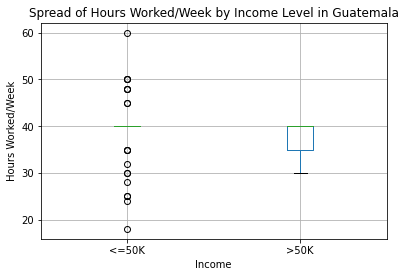

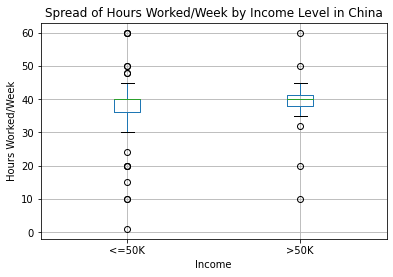

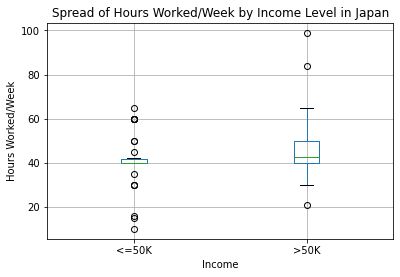

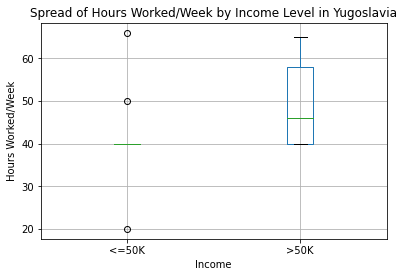

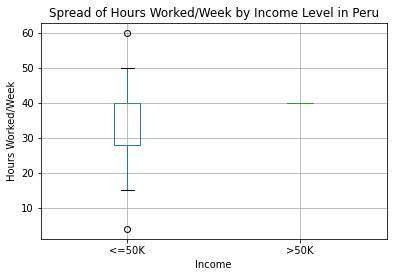

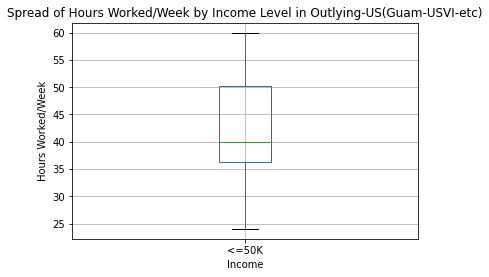

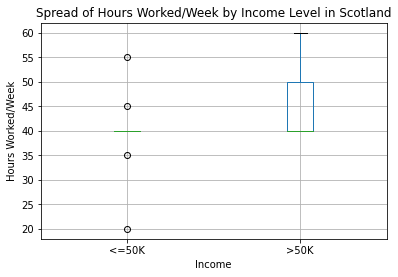

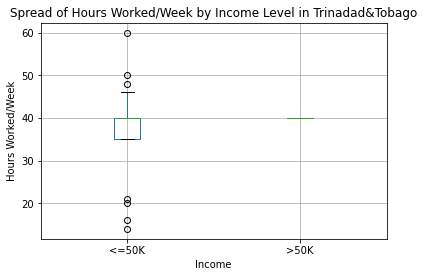

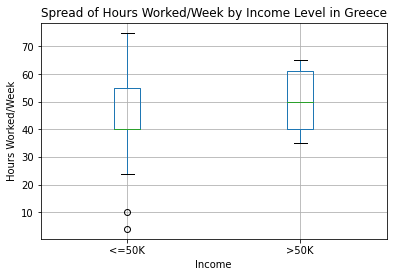

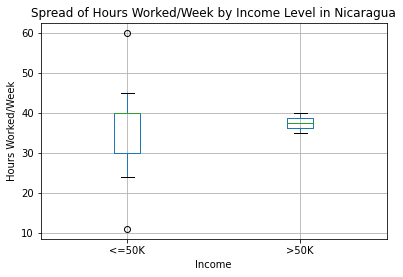

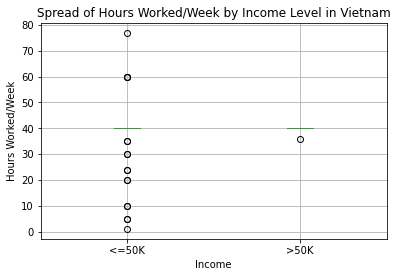

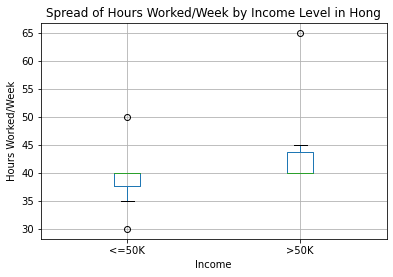

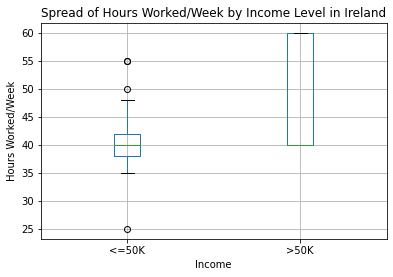

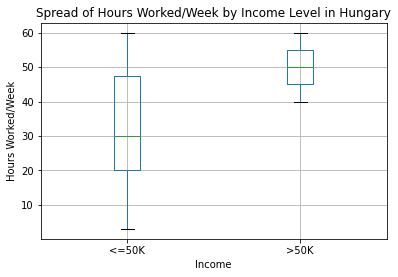

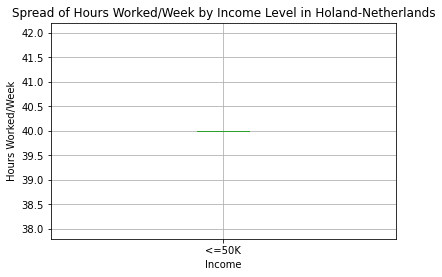

In [8]:
names = adults['native-country'].unique()
for c in names:
    country = adults[adults['native-country'] == c]
    country.boxplot(column=['hours-per-week'], by=['income'])
    plt.title('Spread of Hours Worked/Week by Income Level in ' + c)
    plt.suptitle('')
    plt.xlabel('Income')
    plt.ylabel('Hours Worked/Week')


vii. Create a table where entry (x, y) contains the conditional probability
P(A random adult has level of education x | their education-num is y).

P(A|B) = P(A,B) / P(B)

A - a random adult has a level of education x (qualitative)

B - their education-num is y

In [9]:
def level_given_num(a,b):
    pA = adults[adults['education'] == a] # finds the numerator of prob(a) 
    pB = adults[adults['education-num'] == b] # finds the numerator of prob(b)
    pBlen = len(pB) # total amount of adults with education num x 
    AandB = pA[pA['education-num'] == b]
    return  len(AandB)/ pBlen 
    
    # print(f'{a},{b}')

education_nums = adults['education-num'].unique()
educations = adults['education'].unique()
# print(educations)

table =np.array([ [ level_given_num(b,a) for a in education_nums] for b in educations ])
pd.DataFrame(table, columns = education_nums, index = educations)

,13,9,7,14,5,10,12,11,4,16,15,3,6,2,1,8
Bachelors,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HS-grad,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11th,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Masters,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9th,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Some-college,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Assoc-acdm,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Assoc-voc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7th-8th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doctorate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


viii. Create a table where entry (x, y) contains the conditional probability of having marital status
x given that they have occupation y.

P(A|B) = P(A,B) / P(B) & P(A,B) = P(A) * P(B)

A - having marital status x

B - they have occupation y

In [10]:
def maritalStatus_given_occupation(a,b):
    pA = adults[adults['marital-status'] == a] # finds the numerator of prob(a) 
    pB = adults[adults['occupation'] == b] # finds the numerator of prob(b)
    pBlen = len(pB) # total amount of adults with education num x 
    AandB = pA[pA['occupation'] == b]
    return  len(AandB)/ pBlen 
    
    # print(f'{a},{b}')
    
martial_status = adults['marital-status'].unique()
occupation = adults['occupation'].unique()
# print(martial_status)
table2 =np.array([ [ maritalStatus_given_occupation(a,b) for a in martial_status] for b in occupation ])
pd.DataFrame(table2, columns = martial_status, index = occupation)

,Never-married,Married-civ-spouse,Divorced,Married-spouse-absent,Separated,Married-AF-spouse,Widowed
Adm-clerical,0.422016,0.261538,0.217241,0.015650,0.038992,0.001326,0.043236
Exec-managerial,0.196508,0.601082,0.148549,0.007624,0.023119,0.000246,0.022873
Handlers-cleaners,0.508029,0.340876,0.093431,0.016788,0.027737,0.000000,0.013139
Prof-specialty,0.298068,0.513527,0.130193,0.011353,0.023913,0.000725,0.022222
Other-service,0.498027,0.219423,0.152049,0.017906,0.057663,0.001214,0.053718
Sales,0.361370,0.455616,0.118904,0.009315,0.025479,0.000548,0.028767
Craft-repair,0.212735,0.625518,0.113198,0.012686,0.025128,0.000732,0.010002
Transport-moving,0.212899,0.622417,0.113338,0.011897,0.023168,0.000626,0.015654
Farming-fishing,0.290744,0.578471,0.064386,0.024145,0.018109,0.001006,0.023139
Machine-op-inspct,0.285215,0.495005,0.138362,0.012987,0.041958,0.000000,0.026474


ix. What is the conditional probability of making more or less than $50k given that a person
works in each different occupation?

P(A|B) = P(A,B) / P(B) & P(A,B) = P(A) * P(B)

A - more or less than $50k

B - works in occupation x

In [11]:
# do >$50k first:
num_occupations = len(adults['occupation'].unique())
#print(adults['occupation'].unique())

# need to loop through all occupations
for i in adults['occupation'].unique():
    current = adults[ (adults['occupation'] == i) & (adults['income'] == '>50K') ]
    #probability person works in occupation ___ & has income >50k
    pAnB = len(current) / len(adults)
    #print(pAnB)
    
    B = adults[ (adults['occupation'] == i) ]
    pB = len(B) / len(adults)
    
    pAgivenB = pAnB / pB
    print(f'The probability that an adult makes more than $50k given that a(n) adult works as an {i} is {pAgivenB}')

The probability that an adult makes more than $50k given that a(n) adult works as an Adm-clerical is 0.13448275862068965
The probability that an adult makes more than $50k given that a(n) adult works as an Exec-managerial is 0.4840137727496311
The probability that an adult makes more than $50k given that a(n) adult works as an Handlers-cleaners is 0.06277372262773723
The probability that an adult makes more than $50k given that a(n) adult works as an Prof-specialty is 0.44903381642512075
The probability that an adult makes more than $50k given that a(n) adult works as an Other-service is 0.04157814871016692
The probability that an adult makes more than $50k given that a(n) adult works as an Sales is 0.2693150684931507
The probability that an adult makes more than $50k given that a(n) adult works as an Craft-repair is 0.22664064405952672
The probability that an adult makes more than $50k given that a(n) adult works as an Transport-moving is 0.20037570444583594
The probability that an ad

In [12]:
# do <=$50k now:
# need to loop through all occupations
for i in adults['occupation'].unique():
    current = adults[ (adults['occupation'] == i) & (adults['income'] == '<=50K') ]
    #probability person works in occupation ___ & has income >50k
    pAnB = len(current) / len(adults)
    #print(pAnB)
    
    B = adults[ (adults['occupation'] == i) ]
    pB = len(B) / len(adults)
    
    pAgivenB = pAnB / pB
    print(f'The probability that an adult makes less than $50k given that a(n) adult works as an {i} is {pAgivenB}')

The probability that an adult makes less than $50k given that a(n) adult works as an Adm-clerical is 0.8655172413793103
The probability that an adult makes less than $50k given that a(n) adult works as an Exec-managerial is 0.5159862272503689
The probability that an adult makes less than $50k given that a(n) adult works as an Handlers-cleaners is 0.9372262773722628
The probability that an adult makes less than $50k given that a(n) adult works as an Prof-specialty is 0.5509661835748791
The probability that an adult makes less than $50k given that a(n) adult works as an Other-service is 0.9584218512898331
The probability that an adult makes less than $50k given that a(n) adult works as an Sales is 0.7306849315068493
The probability that an adult makes less than $50k given that a(n) adult works as an Craft-repair is 0.7733593559404733
The probability that an adult makes less than $50k given that a(n) adult works as an Transport-moving is 0.799624295554164
The probability that an adult mak

x. Plot the change in probability that a person makes more and less than $50k given the amount
that they work per week

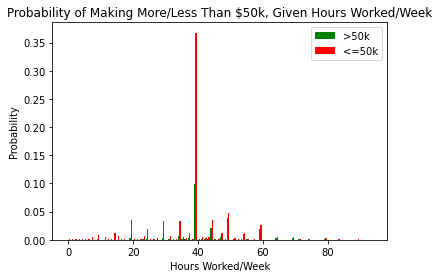

In [13]:
# go through all adults and count above50k and below50k for all hours-per-week
above_length = len(adults['income'] == ">50K")
below_length = len(adults['income'] == "<=50K")

below_50k_probs = []
above_50k_probs = []

for y in range(1,len(adults['hours-per-week'].unique()) + 1):
    # all adults with hours-per-week of y
    hours = adults[adults['hours-per-week'] == y]
    hours_below = hours[hours['income'] == "<=50K"]
    hours_above = hours[hours['income'] == ">50K"]
 
    p_below = len(hours_below) / below_length
    p_above = len(hours_above) / above_length
    
    #print("Y=", y)
    #print("Probability Below:", p_below)
    #print("Probability Above:", p_above)
    
    below_50k_probs.append(p_below)
    above_50k_probs.append(p_above)

labels = []
for i in range(1,len(adults['hours-per-week'].unique()) + 1):
    labels.append(i)

x = np.arange(len(labels)) 
width = 0.4
plt.bar(x, above_50k_probs, width, color = "green")
plt.bar(x+width, below_50k_probs, width, color = "red")
plt.xticks(None)
plt.title("Probability of Making More/Less Than $50k, Given Hours Worked/Week")
plt.xlabel("Hours Worked/Week")
plt.ylabel("Probability")
plt.legend([">50k", "<=50k"])

# 3 (b)

Suppose we send 30% of our products to company A and 70% of our products to company B.
Company A reports that 5% of our products are defective and company B reports that 4% of
our products are defective. For each probability below, compute the precise value by hand, and
also write a short Python script to simulate the above scenario and estimate each probability by
empirically examining the rates of each event.

i. Find the probability that a product is sent to company A and it is defective.

ii. Find the probability that a product is sent to company A and it is not defective.

iii. Find the probability that a product is sent to company B and it is defective.

iv. Find the probability that a product is sent to company B and it is not defective.

In [14]:
# basically do a test to see what the sample numbers are vs the actual numbers we got on paper
# us numpy random - randomly chooses if product goes to A or B & if it was defective
# columns: company & defective
sample_num = 30

pA = 0.3 # probability a product is sent to A
pB = 0.7 # probability a product is sent to B
pAD = pA * (0.05) # probability a product is sent to A and is defective
pAN = pA * (0.95) # probability a product is sent to A and is NOT defective
pBD = pB * (0.04) # probability a product is sent to A and is defective
pBN = pB * (0.96) # probability a product is sent to A and is NOT defective

rand_products = np.random.choice(['A-Defective', 'A-NonDefective', 'B-Defective', 'B-NonDefective'], 
                                 sample_num, p=[pAD, pAN, pBD, pBN])

df = pd.DataFrame(rand_products)
print(df)

                 0
0   B-NonDefective
1      B-Defective
2   B-NonDefective
3   A-NonDefective
4   B-NonDefective
5      B-Defective
6   A-NonDefective
7   B-NonDefective
8   B-NonDefective
9   A-NonDefective
10  B-NonDefective
11  B-NonDefective
12  B-NonDefective
13  B-NonDefective
14  B-NonDefective
15  B-NonDefective
16  A-NonDefective
17  B-NonDefective
18  B-NonDefective
19  B-NonDefective
20  A-NonDefective
21  A-NonDefective
22  B-NonDefective
23  B-NonDefective
24  A-NonDefective
25  A-NonDefective
26  B-NonDefective
27  B-NonDefective
28  B-NonDefective
29  A-NonDefective


In [15]:
numAD = len(df[df[0] == 'A-Defective']) # number of A-Defectives
numAN = len(df[df[0] == 'A-NonDefective']) # number of A-NonDefectives
numBD = len(df[df[0] == 'B-Defective']) # number of B-Defectives
numBN = len(df[df[0] == 'B-NonDefective']) # number of B-NonDefectives
#print(numAD)
#print(sample_num)

pAD_sampled = numAD / sample_num # probability of A-Defectives from sampled
pAN_sampled = numAN / sample_num # probability of A-NonDefectives from sampled
pBD_sampled = numBD / sample_num # probability of B-Defectives from sampled
pBN_sampled = numBN / sample_num # probability of B-NonDefectives from sampled

print('Probability of A-Defectives:', pAD_sampled)
print('Probability of A-NonDefectives:', pAN_sampled)
print('Probability of B-Defectives:', pBD_sampled)
print('Probability of B-NonDefectives:', pBN_sampled)

Probability of A-Defectives: 0.0
Probability of A-NonDefectives: 0.3
Probability of B-Defectives: 0.06666666666666667
Probability of B-NonDefectives: 0.6333333333333333


Comparing these sampled probabilities to the theoretical ones done by hand, I see slight differences but they're kind of close. By hand, the probability that a product is sent to A and is defective is 1.5%, while from the sample it is about 6.7%. I found the probability that a product is sent to A and is NOT defective is 28.5%, while the sample showed approximately 37%. For the B company, I found the probability that a product is defective to be 2.8% while the sample showed it to be 3%, and finally I found the probability that a product is NOT defective to be 67.2% while the sample showed 53%.